# STOCK SURGE: TECH GIANTS' JOURNEY 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.impute import KNNImputer
import plotly as py
from scipy import stats
df=pd.read_csv("data.csv")
df

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,7/17/2023,193.99,50520160.0,191.90,194.32,191.81
1,AAPL,7/14/2023,190.69,41616240.0,190.23,191.18,189.63
2,AAPL,7/13/2023,190.54,41342340.0,190.50,191.19,189.78
3,AAPL,7/12/2023,189.77,60750250.0,189.68,191.70,188.47
4,AAPL,7/11/2023,188.08,46638120.0,189.16,189.30,186.60
...,...,...,...,...,...,...,...
25155,NFLX,7/24/2013,34.47,33395351.0,35.67,36.04,34.31
25156,NFLX,7/23/2013,35.75,76792963.0,35.91,37.46,35.17
25157,NFLX,7/22/2013,37.42,44791095.0,38.12,38.39,36.73
25158,NFLX,7/19/2013,37.80,18098750.0,38.20,38.28,37.60


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     25160 non-null  object 
 1   Date        25160 non-null  object 
 2   Close/Last  25160 non-null  float64
 3   Volume      25160 non-null  float64
 4   Open        25160 non-null  float64
 5   High        25160 non-null  float64
 6   Low         25160 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


In [3]:
df.isnull().sum()

Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [4]:
# 1. Calculate the Moving Average for Multiple Companies:

# Using a for loop, calculate the 5-day moving average for the Close/Last prices of each company and store the result in a new column 5-Day Moving Avg. Display the first few rows for verification.


In [6]:
# Initialize an empty DataFrame to store results
moving_avg_df = pd.DataFrame()

# List of unique companies
companies = df['Company'].unique()

for company in companies:
    company_data = df[df['Company'] == company].copy()
    # Calculate 5-day moving average
    company_data['5-Day Moving Avg'] = company_data['Close/Last'].rolling(window=5).mean()
    moving_avg_df = pd.concat([moving_avg_df, company_data])

print(moving_avg_df.head())

  Company       Date  Close/Last      Volume    Open    High     Low  \
0    AAPL  7/17/2023      193.99  50520160.0  191.90  194.32  191.81   
1    AAPL  7/14/2023      190.69  41616240.0  190.23  191.18  189.63   
2    AAPL  7/13/2023      190.54  41342340.0  190.50  191.19  189.78   
3    AAPL  7/12/2023      189.77  60750250.0  189.68  191.70  188.47   
4    AAPL  7/11/2023      188.08  46638120.0  189.16  189.30  186.60   

   5-Day Moving Avg  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4           190.614  


In [7]:
# 2. Object-Oriented Programming (OOP) Practical Questions:
# Stock Class with Basic Information:

# Create a class Stock that stores the company name, date, and closing price. Add methods to display this information and calculate the percentage change from a given previous price.

In [8]:
class Stock:
    def __init__(self, company, date, close_price):
        self.company = company
        self.date = date
        self.close_price = close_price

    def display_info(self):
        print(f"Company: {self.company} | Date: {self.date} | Closing Price: {self.close_price}")

    def percentage_change(self, previous_price):
        change = ((self.close_price - previous_price) / previous_price) * 100
        return change

# Example Usage
stock = Stock('Apple', '2024-01-01', 150)
stock.display_info()
print(f"Percentage Change: {stock.percentage_change(140)}%")

Company: Apple | Date: 2024-01-01 | Closing Price: 150
Percentage Change: 7.142857142857142%


In [9]:
# 3. Advanced Python: Aggregations in Pandas
# Question:
# Write a Python function that groups the stock data by month and calculates the average Close/Last price for each month.

In [10]:
def monthly_average_close(data):
    data['Date'] = pd.to_datetime(data['Date'])  # Convert Date column to datetime
    data['Month'] = data['Date'].dt.to_period('M')  # Create a new Month column
    monthly_avg = data.groupby('Month')['Close/Last'].mean()
    return monthly_avg

# Example usage
monthly_avg_prices = monthly_average_close
print(monthly_avg_prices)

<function monthly_average_close at 0x0000015B44448400>


In [11]:
# 5. Visualize Outliers: Plot boxplots to visualize outliers in the "Close/Last" and "Volume" columns.

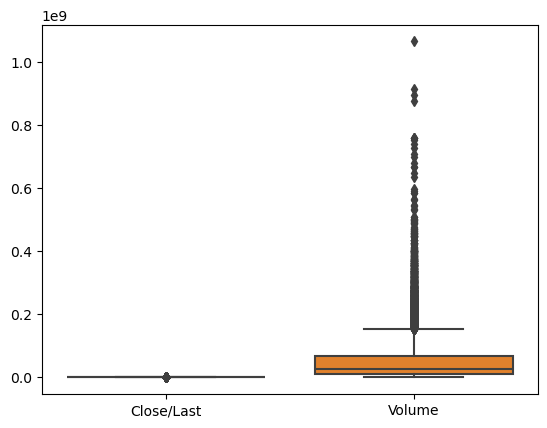

In [12]:
sns.boxplot(data=df[['Close/Last', 'Volume']])
plt.show()

In [13]:
# 6. Data Preprocessing: Feature Scaling
#Question:
#Normalize the Volume, Open, High, Low, and Close/Last columns using Min-Max scaling, which scales the values to a range of 0 to 1.

In [14]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(df):
    scaler = MinMaxScaler()
    columns_to_scale = ['Volume', 'Open', 'High', 'Low', 'Close/Last']
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    return df

# Example usage
normalized_data = normalize_data
print(normalized_data)

<function normalize_data at 0x0000015B3DF57060>


In [15]:
# 7. Question: Using NumPy, calculate the standard deviation and variance of Close/Last prices for Apple. How do these metrics help in understanding stock volatility?

In [16]:
apple_prices = df[df['Company'] == 'Apple']['Close/Last'].values

# Calculate variance and standard deviation
variance = np.var(apple_prices)
std_dev = np.std(apple_prices)

print(f"Variance: {variance}, Standard Deviation: {std_dev}")


Variance: nan, Standard Deviation: nan


C:\Users\Vishv Pratap Singh\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Vishv Pratap Singh\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Vishv Pratap Singh\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Vishv Pratap Singh\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [17]:
# 8. Group the dataset by company and calculate the total Volume traded and the average Close/Last price for each company.

In [18]:
grouped_data = df.groupby('Company').agg({
    'Volume': 'sum',
    'Close/Last': 'mean'
}).reset_index()

print(grouped_data)

  Company        Volume  Close/Last
0    AAPL  3.760073e+11   70.295004
1     AMD  1.343899e+11   38.069118
2    AMZN  2.014404e+11   78.827305
3    CSCO  6.138462e+10   39.090199
4    META  7.224408e+10  165.724205
5    MSFT  7.833965e+10  135.610882
6    NFLX  2.826213e+10  256.768661
7    QCOM  2.706964e+10   86.945473
8    SBUX  2.206126e+10   69.964670
9    TSLA  2.899529e+11   83.265262


In [19]:
# 9. Calculating Stock Volatility:
# : Calculate the volatility for each company as the standard deviation of daily percentage changes in Close/Last prices. Identify the top 3 most volatile stocks

In [20]:
# Calculate daily percentage changes
df['Daily_Change'] = df.groupby('Company')['Close/Last'].pct_change()

# Calculate volatility (standard deviation of daily changes)
volatility = df.groupby('Company')['Daily_Change'].std().reset_index()
volatility.columns = ['Company', 'Volatility']

# Sort and get top 3 volatile companies
top_volatile = volatility.sort_values(by='Volatility', ascending=False).head(3)
print("Top 3 Most Volatile Stocks:\n", top_volatile)

Top 3 Most Volatile Stocks:
   Company  Volatility
1     AMD    0.035940
9    TSLA    0.035502
6    NFLX    0.029301


In [21]:
# 10. Matrix Transformation
#Convert the Open, Close/Last, High, and Low prices of all companies into a 2D NumPy array where each column represents a feature. Then, transpose the matrix and display the result.

In [22]:
import numpy as np

# Extract the relevant columns
stock_data = df[['Open', 'High', 'Low', 'Close/Last']].values

# Transpose the matrix
transposed_data = np.transpose(stock_data)

print("Transposed Data Matrix:\n", transposed_data)

Transposed Data Matrix:
 [[191.9  190.23 190.5  ...  38.12  38.2   38.62]
 [194.32 191.18 191.19 ...  38.39  38.28  38.62]
 [191.81 189.63 189.78 ...  36.73  37.6   37.71]
 [193.99 190.69 190.54 ...  37.42  37.8   38.06]]


In [23]:
# 11.  Data Visualization: Line Plot
#  Question:
 #  Using Matplotlib, create a line plot of the Close/Last price over time for a specific company (AAPL).

C:\Users\Vishv Pratap Singh\AppData\Local\Temp\ipykernel_20348\4069967332.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date'] = pd.to_datetime(company_data['Date'])  # Convert to datetime


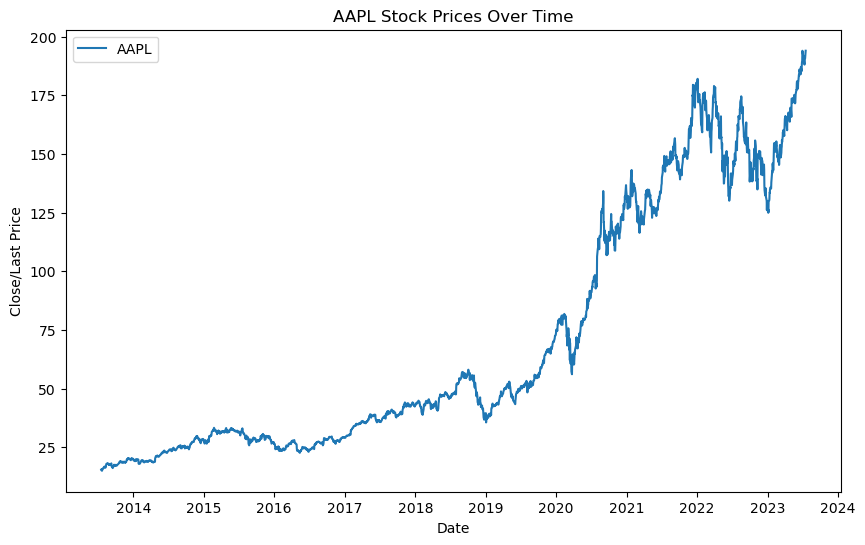

In [24]:
import matplotlib.pyplot as plt

def plot_stock_price(data, company):
    company_data = data[data['Company'] == company]
    company_data['Date'] = pd.to_datetime(company_data['Date'])  # Convert to datetime
    plt.figure(figsize=(10, 6))
    plt.plot(company_data['Date'], company_data['Close/Last'], label=company)
    plt.title(f'{company} Stock Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close/Last Price')
    plt.legend()
    plt.show()

# Example usage
plot_stock_price(df, 'AAPL')

In [25]:
# 12. Data Visualization: Box Plot
# Create a box plot of the Volume for a specific company to visualize its distribution and detect potential outliers.

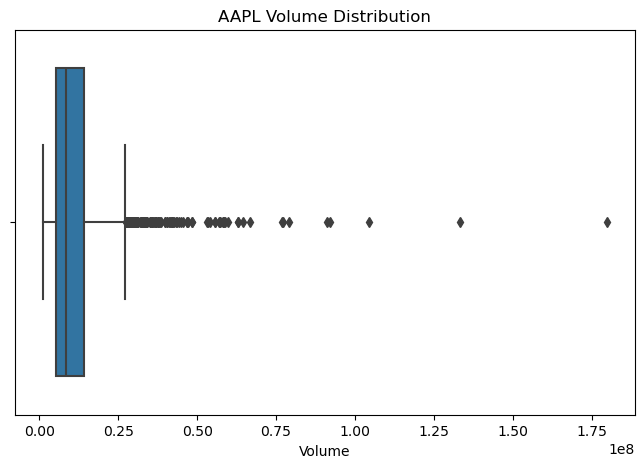

In [26]:
def plot_boxplot_volume(df, company):
    company_data1 = df[df['Company'] == company]
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=company_data['Volume'])
    plt.title(f'{company} Volume Distribution')
    plt.xlabel('Volume')
    plt.show()

# Example usage
plot_boxplot_volume(df, 'AAPL')

In [27]:
# 13. Correlation Heatmap: Visualize the correlation between stock price features (Open, Close/Last, High, Low).

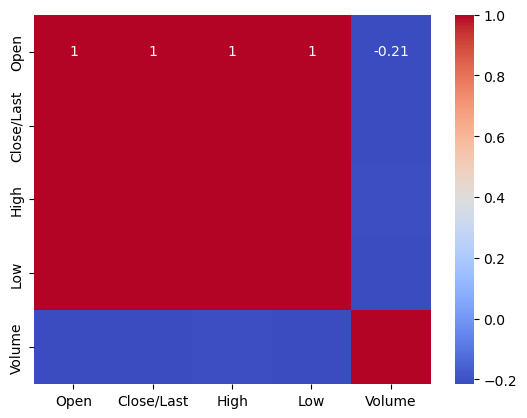

In [28]:
corr = df[['Open', 'Close/Last', 'High', 'Low', 'Volume']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [29]:
# 14. Pair Plot: Visualize pairwise relationships between numerical columns in the dataset.

C:\Users\Vishv Pratap Singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vishv Pratap Singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vishv Pratap Singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vishv Pratap Singh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

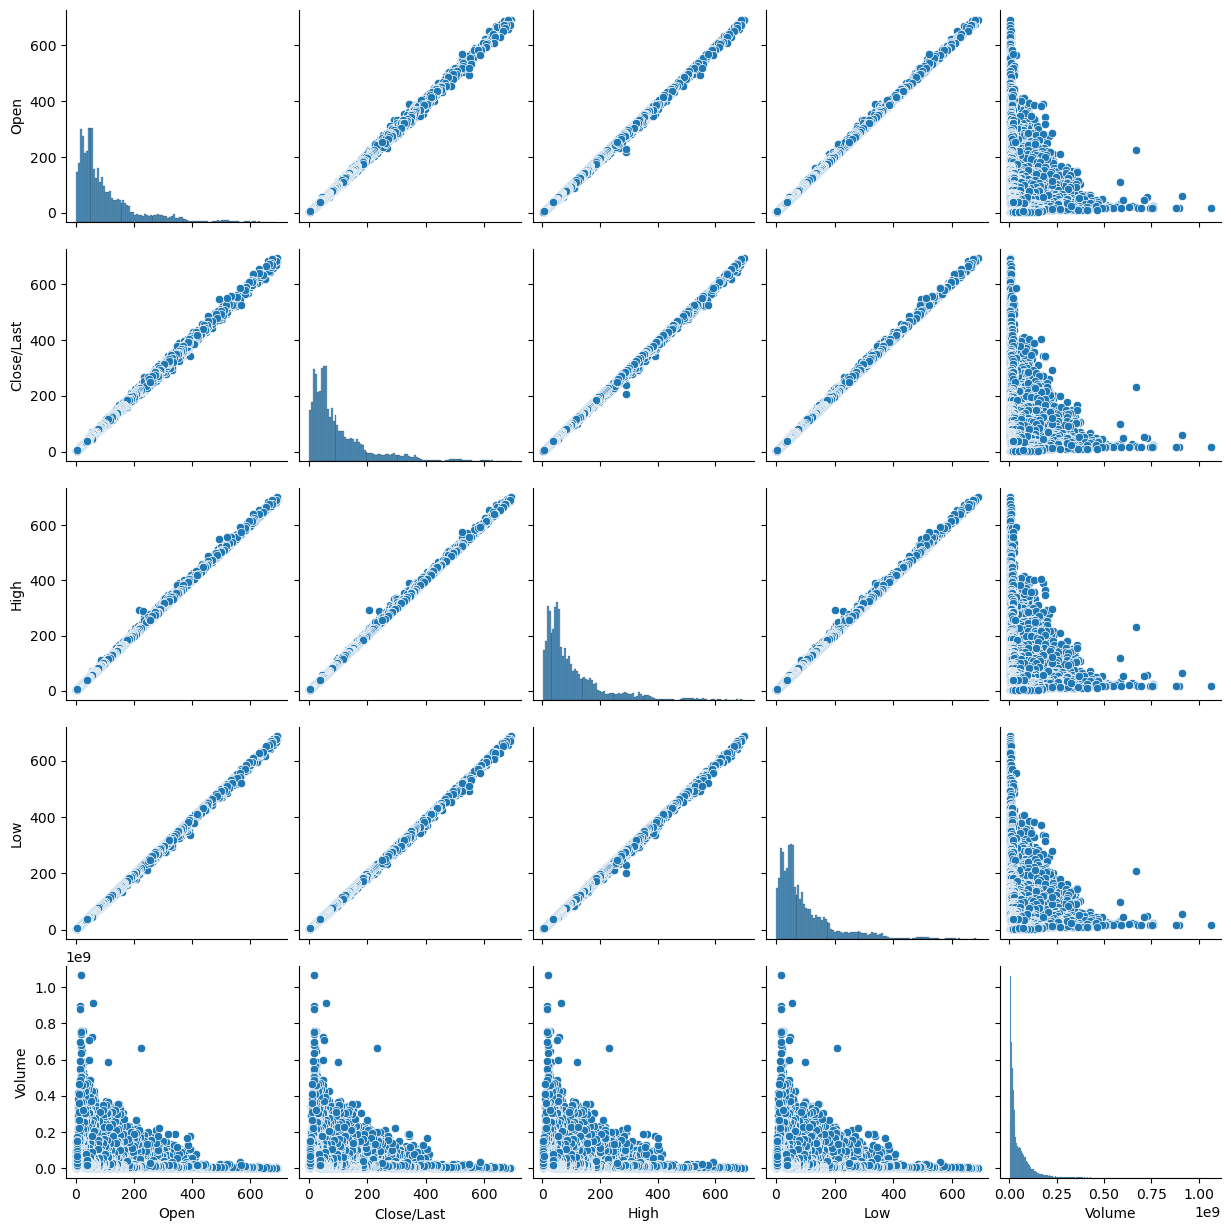

In [33]:
import seaborn as sns
sns.pairplot(df[['Open', 'Close/Last', 'High', 'Low', 'Volume']])

In [34]:
# 15. Autocorrelation: Calculate and plot the autocorrelation of the closing prices to assess time series dependencies.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

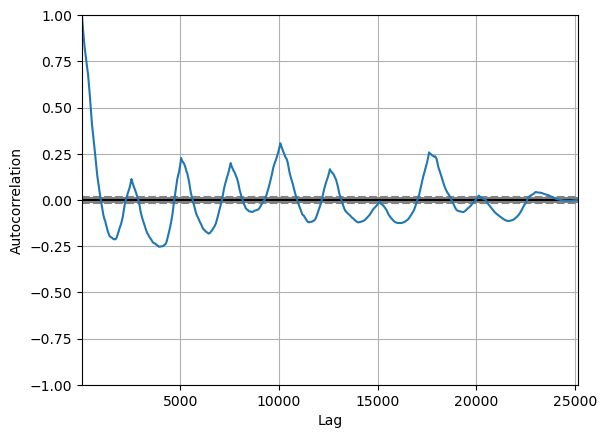

In [36]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Close/Last'])


In [37]:
# 16. Statistics: Correlation Analysis
# Question:
# Calculate the correlation between Volume and Close/Last price for a given company. Use a heatmap to visualize the correlation matrix for all numerical features.

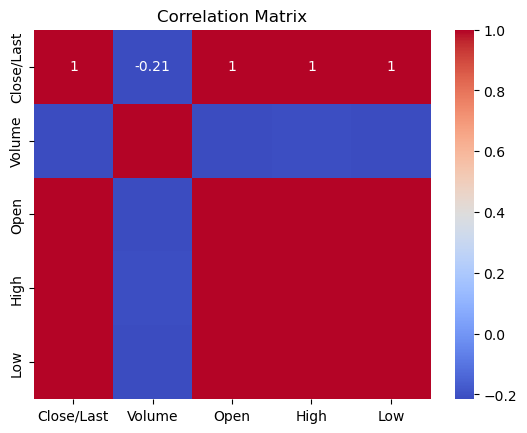

In [38]:
import seaborn as sns
import numpy as np

def correlation_matrix(data):
    corr_matrix = data[['Close/Last', 'Volume', 'Open', 'High', 'Low']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

# Example usage
correlation_matrix(df)

In [39]:
# 17. Create a class Stock that stores information about a stock's daily performance, including the company, open_price, close_price, high_price, low_price, and volume. Add methods to:

#  Calculate the daily price range (high_price - low_price).
#  Calculate the percentage change from open_price to close_price.
# outliers

In [40]:
class Stock:
    def __init__(self, company, open_price, close_price, high_price, low_price, volume):
        self.company = company
        self.open_price = open_price
        self.close_price = close_price
        self.high_price = high_price
        self.low_price = low_price
        self.volume = volume

    def price_range(self):
        return self.high_price - self.low_price

    def percent_change(self):
        return ((self.close_price - self.open_price) / self.open_price) * 100

# Example usage
apple = Stock('AAPL', 191.90, 193.99, 194.32, 191.81, 50520160)
print("Price Range: $", apple.price_range())
print("Percent Change: ", apple.percent_change(), "%")

Price Range: $ 2.509999999999991
Percent Change:  1.0891089108910907 %


In [41]:
# 18. Statistics: Hypothesis Testing
#Perform a hypothesis test to check if there is a significant difference in the mean Close/Last price between two companies (e.g., AAPL and GOOGL). Use a t-test to check if their means are statistically different.

In [56]:
from scipy.stats import ttest_ind

def t_test_between_companies(df, company1, company2):
    company1_data = df[df['Company'] == company1]['Close/Last']
    company2_data = df[df['Company'] == company2]['Close/Last']
    
    # Perform t-test
    t_stat, p_value = ttest_ind(company1_data, company2_data, nan_policy='omit')
    return t_stat, p_value

# Example usage
t_stat, p_value = t_test_between_companies(df, 'AAPL', 'GOOGL')
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: nan, P-value: nan


In [43]:
# 19. Machine Learning: Linear Regression
# Question:
# Create a linear regression model to predict the Close/Last price based on Volume, Open, High, and Low. Evaluate the model's performance using R-squared.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def linear_regression_model(data):
    features = ['Volume', 'Open', 'High', 'Low']
    target = 'Close/Last'
    
    X = data[features]
    y = data[target]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f"R-squared: {score}")
    
    return model

# Example usage
linear_regression_model(df)


R-squared: 0.9998359734986029


LinearRegression()

In [45]:
# 20.  Machine Learning: Logistic Regression
# Question:
# Create a binary classification problem where 1 indicates that the stock Close/Last price is higher than the Open price, and 0 otherwise. Train a logistic regression model to predict the direction of the stock price.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def logistic_regression_model(data):
    data['Target'] = np.where(data['Close/Last'] > data['Open'], 1, 0)
    
    features = ['Volume', 'Open', 'High', 'Low']
    X = data[features]
    y = data['Target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    
    return model

# Example usage
logistic_regression_model(df)

Accuracy: 0.49377318494965555


LogisticRegression()

In [47]:
# 21. Time-Series Analysis: Rolling Mean
#Calculate the 7-day rolling mean for the Close/Last price and visualize it along with the actual price on the same plot.

C:\Users\Vishv Pratap Singh\AppData\Local\Temp\ipykernel_20348\2693997222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date'] = pd.to_datetime(company_data['Date'])
C:\Users\Vishv Pratap Singh\AppData\Local\Temp\ipykernel_20348\2693997222.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['7-day Rolling Mean'] = company_data['Close/Last'].rolling(window=7).mean()


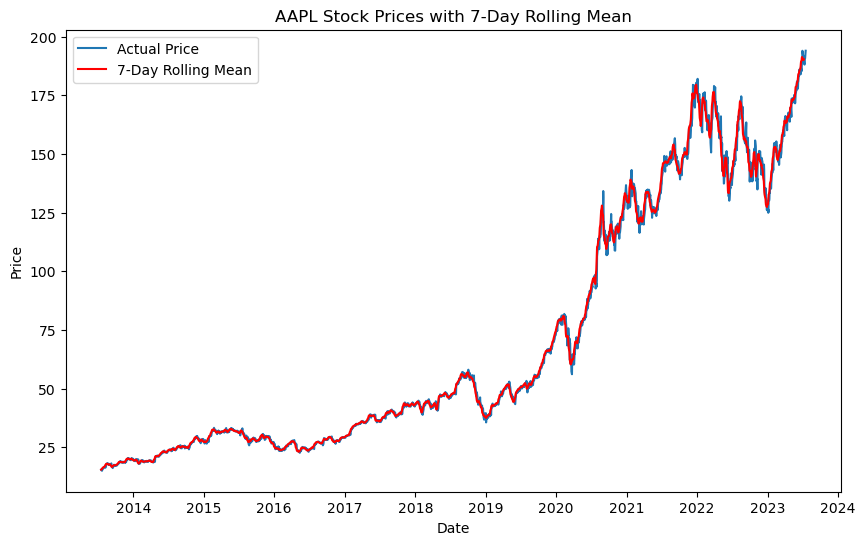

In [48]:
def plot_rolling_mean(data, company):
    company_data = data[data['Company'] == company]
    company_data['Date'] = pd.to_datetime(company_data['Date'])
    company_data.set_index('Date', inplace=True)

    # Calculate rolling mean
    company_data['7-day Rolling Mean'] = company_data['Close/Last'].rolling(window=7).mean()

    # Plot actual vs rolling mean
    plt.figure(figsize=(10, 6))
    plt.plot(company_data['Close/Last'], label='Actual Price')
    plt.plot(company_data['7-day Rolling Mean'], label='7-Day Rolling Mean', color='red')
    plt.title(f'{company} Stock Prices with 7-Day Rolling Mean')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Example usage
plot_rolling_mean(df, 'AAPL')

In [49]:
# 22. Machine Learning: Train-Test Split
# Split the dataset into a training set (80%) and a test set (20%) for predicting the Close/Last price using Open, High, Low, and Volume as features.


In [50]:
from sklearn.model_selection import train_test_split

def split_data(df):
    features = ['Open', 'High', 'Low', 'Volume']
    target = 'Close/Last'
    
    X = df[features]
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Example usage
X_train, X_test, y_train, y_test = split_data(df)
print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}")

Training set size: 20128, Test set size: 5032


In [51]:
# 23. Machine Learning: Decision Tree Model
#Create a decision tree regression model to predict the Close/Last price based on the Volume, Open, High, and Low features. Evaluate the model's performance using mean squared error.

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

def cross_validation_model(df):
    features = ['Open', 'High', 'Low', 'Volume']
    target = 'Close/Last'
    
    X = df[features]
    y = df[target]
    
    model = LinearRegression()
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    average_mse = -cv_scores.mean()
    
    print(f"Average Mean Squared Error: {average_mse}")

# Example usage
cross_validation_model(df)

Average Mean Squared Error: 1.8777814057998459


In [53]:
# 24. Machine Learning: Feature Importance Using Random Forest
#Use a random forest regression model to predict the Close/Last price and rank the importance of the input features (Volume, Open, High, Low).

In [54]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_feature_importance(X_train, y_train):
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Get feature importance
    feature_importance = model.feature_importances_
    feature_names = X_train.columns
    
    for name, importance in zip(feature_names, feature_importance):
        print(f'{name}: {importance}')
    
    return model

# Example usage
random_forest_feature_importance(X_train, y_train)

Open: 0.0002448408134999676
High: 0.3698761653428331
Low: 0.6298426942074594
Volume: 3.629963620753898e-05


RandomForestRegressor(random_state=42)